Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:




### 1. Realizar el ajuste o ajustes de los modelos


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [28]:
df=pd.read_csv("datos/EST_Social_Network_Ads.csv", index_col=0)
df.head(3)

,age,estimatedsalary,purchased,gender_Female,gender_Male
0,19.0,19000.0,0.0,0.0,1.0
1,35.0,20000.0,0.0,0.0,1.0
2,26.0,43000.0,0.0,1.0,0.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              800 non-null    float64
 1   estimatedsalary  800 non-null    float64
 2   purchased        800 non-null    float64
 3   gender_Female    800 non-null    float64
 4   gender_Male      800 non-null    float64
dtypes: float64(5)
memory usage: 37.5 KB


La mayoria de nuestras variables son 'float', vamos a convertirlas a 'int' para que enel input que realizamos sea admitido por el modelo de Regresion Logistica.  

In [30]:
#https://stackoverflow.com/a/44651302
for col in df.columns:
   df[col] = df[col].apply(lambda x: int(x) if x == x else "")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              800 non-null    int64
 1   estimatedsalary  800 non-null    int64
 2   purchased        800 non-null    int64
 3   gender_Female    800 non-null    int64
 4   gender_Male      800 non-null    int64
dtypes: int64(5)
memory usage: 37.5 KB


- ### Iniciamos el método

In [33]:
# separamos los datos en X e y
X = df.drop("purchased", axis = 1)
y = df["purchased"]

In [34]:
X.head()

,age,estimatedsalary,gender_Female,gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [35]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: purchased, dtype: int64

In [37]:
#separamos los datos de entrenamiento y los datos de prueba: 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo a nuestros datos
log_reg.fit(x_train,y_train)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test)

In [40]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
264,1,0,Train
215,1,0,Train
329,1,1,Train
342,0,1,Train
394,0,1,Train


### 2. Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.



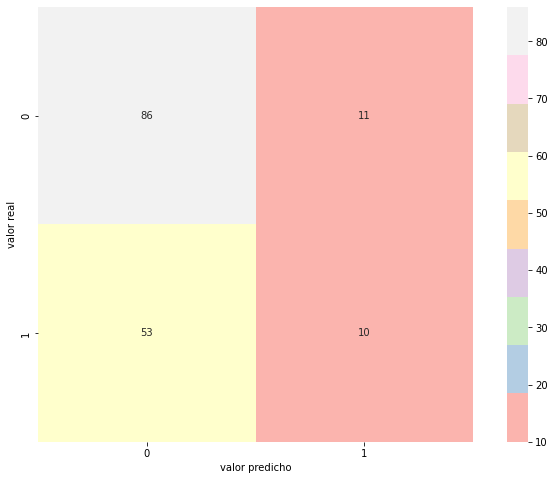

In [52]:
# Generamos nuestra matriz de confusion 
mat_rl = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_rl, square=True, annot=True, fmt="d", cmap = "Pastel1")

plt.xlabel('Valor PREDICHO')
plt.ylabel('Valor REAL')
plt.show();

#### INTERPRETACION

Siendo nuestra variable respuesta 0 aquellos que NO pulsan el botón y 1 que SI pulsan el botón:

- El modelo es capaz de predecir que 86 personas que NO han pulsado el botón NO lo han pulsado(Verdadero Negativo).

- El modelo predice que 10 personas que SI han pulsado el botón, SI lo han pulsado(Verdadero Positivo)

- El modelo indica que 11 personas que SI han pulsado el botón y en realida NO lo han pulsado(Falso Positivo).

- El modelo predice que 53 que NO han pulsado el botón y SI lo han pulsado(Falso Negativo). 



Guardamos el csv

In [57]:
df.to_csv('datos/EST_Social_Network_Ads_Aj_int.csv')